# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [158]:
from urllib2 import Request, urlopen
import pandas as pd
import requests
import json
from urlparse import urlunparse, urlparse

In [159]:
key = "IcqWz29klKjRfiCAGy2AZvLbt5COAgmqpWy7CbAP"
def ndb_search(term):
    temp = []
    dictList = []
    url = "https://api.nal.usda.gov/ndb/search/?format=json&max=500"
    url = url + "&q=" + term + "&api_key=" + key
    req = requests.get(url)
    x = req.json()
    try:
        x['errors']
        return 0  
    except:
         return x['list']['item']
        
    
ndb_search("quail eggs")    



[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [160]:
data = pd.read_csv("fresh.csv")
data

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit


In [161]:
l = {}
for j in range(0, len(data)):
    x = ndb_search(data['food'][j]) 
    for i in range(0, len(x)):
        if 'raw' in x[i]['name']:
            l[data['food'][j]] = x[i]['ndbno']
            break

In [162]:
df = pd.DataFrame(l.items())
df.columns = ['food', 'ndb_num']

In [163]:
df = df.merge(data)
df

,food,ndb_num,form,price_per_lb,yield,lb_per_cup,price_per_cup,type
0,bananas,09040,Fresh1,0.566983,0.640000,0.330693,0.292965,fruit
1,lettuce_iceberg,11252,Fresh1,1.213039,0.950000,0.242508,0.309655,vegetables
2,mangoes,09176,Fresh1,1.377563,0.710000,0.363763,0.705783,fruit
3,corn_sweet,11900,Fresh1,2.690623,0.540000,0.363763,1.812497,vegetables
4,peaches,09236,Fresh1,1.591187,0.960000,0.341717,0.566390,fruit
5,turnip_greens,11568,Fresh1,2.471749,0.750000,0.319670,1.053526,vegetables
6,artichoke,11007,Fresh1,2.213050,0.375309,0.385809,2.274967,vegetables
7,onions,11282,Fresh1,1.038107,0.900000,0.352740,0.406868,vegetables
8,kale,11233,Fresh1,2.807302,1.050000,0.286601,0.766262,vegetables
9,blueberries,09050,Fresh1,4.734622,0.950000,0.319670,1.593177,fruit


__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [164]:
def ndb_report(num):
    url = "https://api.nal.usda.gov/ndb/V2/reports?ndbno="
    url = url + num + "&type=b" + "&format=json&api_key=" + key
    req = requests.get(url)
    x = req.json()
    return x['foods'][0]['food']['nutrients']

In [165]:
ndb_report("09279")

[{u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit': u'g',
    u'label': u'cup, sliced',
    u'qty': 1.0,
    u'value': u'143.93'},
   {u'eqv': 66.0,
    u'eunit': u'g',
    u'label': u'fruit (2-1/8" dia)',
    u'qty': 1.0,
    u'value': u'57.57'},
   {u'eqv': 151.0,
    u'eunit': u'g',
    u'label': u'NLEA serving',
    u'qty': 1.0,
    u'value': u'131.72'}],
  u'name': u'Water',
  u'nutrient_id': u'255',
  u'unit': u'g',
  u'value': u'87.23'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit': u'g',
    u'label': u'cup, sliced',
    u'qty': 1.0,
    u'value': u'76'},
   {u'eqv': 66.0,
    u'eunit': u'g',
    u'label': u'fruit (2-1/8" dia)',
    u'qty': 1.0,
    u'value': u'30'},
   {u'eqv': 151.0,
    u'eunit': u'g',
    u'label': u'NLEA serving',
    u'qty': 1.0,
    u'value': u'69'}],
  u'name': u'Energy',
  u'nutrient_id': u'208',
  u'unit': u'kcal',
  u'value': u'46'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit

In [167]:
#TEST TO MAKE SURE THIS ACTUALLY GETS NUTRIENTS YO
listcal = ndb_report("09279")[4]
#int(listcal[u'value'])
listcal 

{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'18.84'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'7.54'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'17.24'}],
 u'name': u'Carbohydrate, by difference',
 u'nutrient_id': u'205',
 u'unit': u'g',
 u'value': u'11.42'}

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [168]:
def calc_nutrients(num):
    l = {}
    for i in range(0, len(df)):
        cals = ndb_report(df['ndb_num'][i])[num] 
        try:
            l[df['ndb_num'][i]] = float(cals[u'value']) 
        except:
            l[df['ndb_num'][i]] = int(cals[u'value'])
    return l

In [169]:
l = calc_nutrients(1) #for kcal
l = pd.DataFrame(l.items())
l.columns = ['ndb_num', 'kcal']

In [170]:
df = df.merge(l)

In [171]:
l = calc_nutrients(2)
l = pd.DataFrame(l.items())
l.columns = ['ndb_num', 'protein']

In [172]:
df = df.merge(l)

In [173]:
l = calc_nutrients(3)
l = pd.DataFrame(l.items())
l.columns = ['ndb_num', 'fat']
df = df.merge(l)

In [174]:
l = calc_nutrients(4)
l = pd.DataFrame(l.items())
l.columns = ['ndb_num', 'carbs']
df = df.merge(l)

In [175]:
df

,food,ndb_num,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,kcal,protein,fat,carbs
0,bananas,09040,Fresh1,0.566983,0.640000,0.330693,0.292965,fruit,89.0,1.09,0.33,22.84
1,lettuce_iceberg,11252,Fresh1,1.213039,0.950000,0.242508,0.309655,vegetables,14.0,0.90,0.14,2.97
2,mangoes,09176,Fresh1,1.377563,0.710000,0.363763,0.705783,fruit,60.0,0.82,0.38,14.98
3,corn_sweet,11900,Fresh1,2.690623,0.540000,0.363763,1.812497,vegetables,86.0,3.22,1.18,19.02
4,peaches,09236,Fresh1,1.591187,0.960000,0.341717,0.566390,fruit,39.0,0.91,0.25,9.54
5,turnip_greens,11568,Fresh1,2.471749,0.750000,0.319670,1.053526,vegetables,32.0,1.50,0.30,7.13
6,artichoke,11007,Fresh1,2.213050,0.375309,0.385809,2.274967,vegetables,47.0,3.27,0.15,10.51
7,onions,11282,Fresh1,1.038107,0.900000,0.352740,0.406868,vegetables,40.0,1.10,0.10,9.34
8,kale,11233,Fresh1,2.807302,1.050000,0.286601,0.766262,vegetables,49.0,4.28,0.93,8.75
9,blueberries,09050,Fresh1,4.734622,0.950000,0.319670,1.593177,fruit,57.0,0.74,0.33,14.49


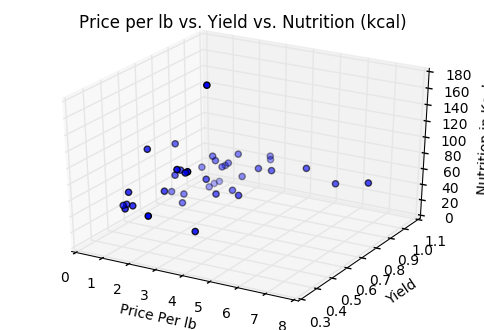

In [176]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["price_per_lb"], df["yield"], df["kcal"])
ax.set_xlabel('Price Per lb')
ax.set_ylabel('Yield')
ax.set_zlabel('Nutrition in Kcal')
ax.set_title('Price per lb vs. Yield vs. Nutrition (kcal)')                                                                             
plt.show()

From here we can see that one of the most expensive fruits also has one of the highest yields and a low kcal value. The next cell will determine what that fruit is. 

In [177]:
x = max(df['price_per_lb'])
df[df['price_per_lb'] == x]

,food,ndb_num,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,kcal,protein,fat,carbs
28,raspberries,09302,Fresh1,6.975811,0.96,0.31967,2.322874,fruit,52.0,1.2,0.65,11.94


From here we see that raspberries take on the value described above. 

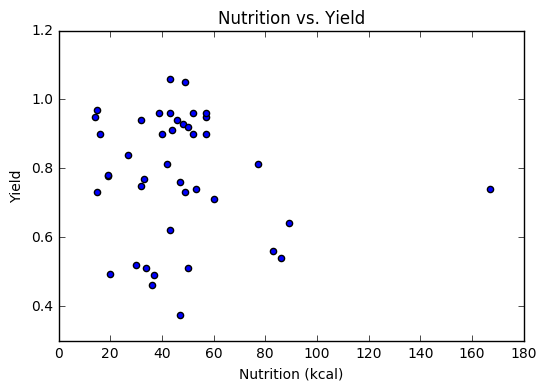

In [178]:
plt.scatter(df['kcal'], df['yield'])
plt.xlabel("Nutrition (kcal)")
plt.ylabel("Yield")
plt.title("Nutrition vs. Yield")
plt.show()

From this graph, we see that there is not much of a correlation between nutrition and yield. It seems like nutrition can not directly determine percent yield. There does seem to be an outlier in this data which is the fruit with kcal approximately equal to 160. The next cell will determine which fruit that is. 

In [179]:
x = max(df['kcal'])
df[df['kcal'] == x]

,food,ndb_num,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,kcal,protein,fat,carbs
19,avocados,09038,Fresh1,2.235874,0.740753,0.31967,0.964886,vegetables,167.0,1.96,15.41,8.64


From here we can see that avocados have a highest calories than all of the fruits. 

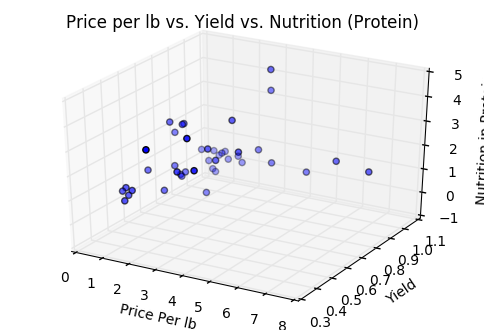

In [180]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["price_per_lb"], df["yield"], df["protein"])
ax.set_xlabel('Price Per lb')
ax.set_ylabel('Yield')
ax.set_zlabel('Nutrition in Protein')
ax.set_title('Price per lb vs. Yield vs. Nutrition (Protein)')                                                                             
plt.show()

From here we see that the vegetables/fruit with the most protein are the ones that have mid price per pound and have a high yield. The fruit/vegetable with the hightest amount of protein is: kale which has a moderate price per pound and also a very high yield.

In [181]:
x = max(df['protein'])
df[df['protein'] == x]

,food,ndb_num,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,kcal,protein,fat,carbs
8,kale,11233,Fresh1,2.807302,1.05,0.286601,0.766262,vegetables,49.0,4.28,0.93,8.75


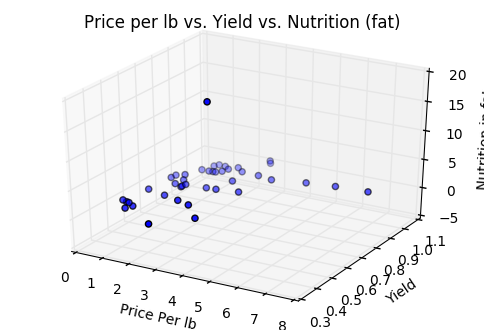

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["price_per_lb"], df["yield"], df["fat"])
ax.set_xlabel('Price Per lb')
ax.set_ylabel('Yield')
ax.set_zlabel('Nutrition in fat')
ax.set_title('Price per lb vs. Yield vs. Nutrition (fat)')                                                                             
plt.show()

From here we see that most of the fruit/veggies are low in fat (which makes sense). There is only one value that seems to be an outlier for amount of fat since it is significantly much higher than the rest of the points. This value is fairly inexpensive per pound and has a somewhat high yield. From the output below we see that this value is avocado. This makes sense since avocados are known to be high in fat.

In [183]:
x = max(df['fat'])
df[df['fat']== x]

,food,ndb_num,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,kcal,protein,fat,carbs
19,avocados,09038,Fresh1,2.235874,0.740753,0.31967,0.964886,vegetables,167.0,1.96,15.41,8.64


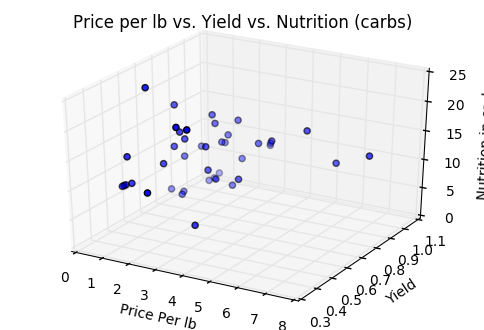

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["price_per_lb"], df["yield"], df["carbs"])
ax.set_xlabel('Price Per lb')
ax.set_ylabel('Yield')
ax.set_zlabel('Nutrition in carbs')
ax.set_title('Price per lb vs. Yield vs. Nutrition (carbs)')                                                                             
plt.show()

Lastly we have price vs yield vs carbs. There is one value that seems to have the highest amount of carbs. It is fairly cheap and seems to have a moderately low yield in comparison to the other points. The block below will calculate the value with the highest carb content. Thus bananas have the highest amount of carbs from the points collected.

In [185]:
x = max(df['carbs'])
df[df['carbs']== x]

,food,ndb_num,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,kcal,protein,fat,carbs
0,bananas,09040,Fresh1,0.566983,0.64,0.330693,0.292965,fruit,89.0,1.09,0.33,22.84
